In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()


Saving loans_lab6.csv.txt to loans_lab6.csv.txt


In [3]:


# Đọc file (tên file cần đúng 100% với file bạn upload)
df = pd.read_csv('loans_lab6.csv.txt')

# Xem trước dữ liệu
df.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [6]:
df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start

In [5]:
print("\n Data types:")
print(df.dtypes)


 Data types:
client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object


In [11]:
df['loan_id'] = df['loan_id'].astype('object')
df['repaid'] = df['repaid'].astype('category')
df['loan_start'] = pd.to_datetime(df['loan_start'],format = '%Y-  %m- %d')
df['loan_end'] = pd.to_datetime(df['loan_end'],format = '%Y-  %m- %d')

In [12]:
print("\n Data types after conversion:")
print(df.dtypes)



 Data types after conversion:
client_id               int64
loan_type              object
loan_amount             int64
repaid               category
loan_id                object
loan_start     datetime64[ns]
loan_end       datetime64[ns]
rate                  float64
dtype: object


In [14]:
df.describe()

,client_id,loan_amount,loan_start,loan_end,rate
count,443.000000,443.000000,443,443,443.000000
mean,38911.060948,7982.311512,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536,3.217156
min,25707.000000,559.000000,2000-01-26 00:00:00,2001-08-02 00:00:00,0.010000
25%,32885.000000,4232.500000,2003-10-19 00:00:00,2005-09-12 12:00:00,1.220000
50%,39505.000000,8320.000000,2007-03-10 00:00:00,2009-03-19 00:00:00,2.780000
75%,46109.000000,11739.000000,2011-07-31 00:00:00,2013-09-11 12:00:00,4.750000
max,49624.000000,14971.000000,2014-11-11 00:00:00,2017-05-07 00:00:00,12.620000
std,7768.681063,4172.891992,NaN,NaN,2.397168


In [16]:
df.describe(exclude=[np.number])

,loan_type,repaid,loan_id,loan_start,loan_end
count,443,443.0,443,443,443
unique,4,2.0,443,NaN,NaN
top,home,1.0,11434,NaN,NaN
freq,121,237.0,1,NaN,NaN
mean,NaN,NaN,NaN,2007-08-02 12:56:53.092550912,2009-08-23 11:35:37.246049536
min,NaN,NaN,NaN,2000-01-26 00:00:00,2001-08-02 00:00:00
25%,NaN,NaN,NaN,2003-10-19 00:00:00,2005-09-12 12:00:00
50%,NaN,NaN,NaN,2007-03-10 00:00:00,2009-03-19 00:00:00
75%,NaN,NaN,NaN,2011-07-31 00:00:00,2013-09-11 12:00:00
max,NaN,NaN,NaN,2014-11-11 00:00:00,2017-05-07 00:00:00


In [15]:
print("\n Summary statistics:")
print(df.describe(include='all'))


 Summary statistics:
           client_id loan_type   loan_amount  repaid loan_id  \
count     443.000000       443    443.000000   443.0     443   
unique           NaN         4           NaN     2.0     443   
top              NaN      home           NaN     1.0   11434   
freq             NaN       121           NaN   237.0       1   
mean    38911.060948       NaN   7982.311512     NaN     NaN   
min     25707.000000       NaN    559.000000     NaN     NaN   
25%     32885.000000       NaN   4232.500000     NaN     NaN   
50%     39505.000000       NaN   8320.000000     NaN     NaN   
75%     46109.000000       NaN  11739.000000     NaN     NaN   
max     49624.000000       NaN  14971.000000     NaN     NaN   
std      7768.681063       NaN   4172.891992     NaN     NaN   

                           loan_start                       loan_end  \
count                             443                            443   
unique                            NaN                            

In [18]:
df.isnull().sum()

,0
client_id,0
loan_type,0
loan_amount,0
repaid,0
loan_id,0
loan_start,0
loan_end,0
rate,0


In [17]:
print("\n Missing values per column:")
print(df.isnull().sum())



 Missing values per column:
client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64


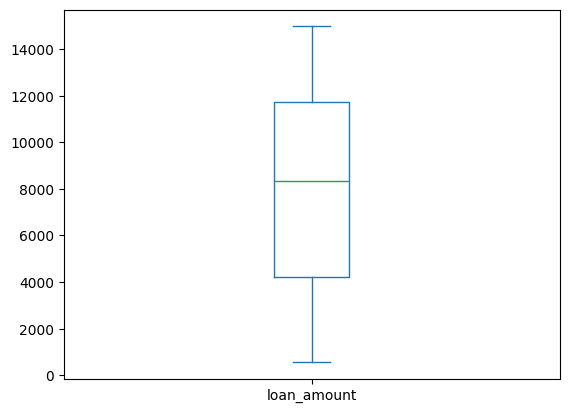

In [19]:
df['loan_amount'].plot(kind='box')
plt.show()

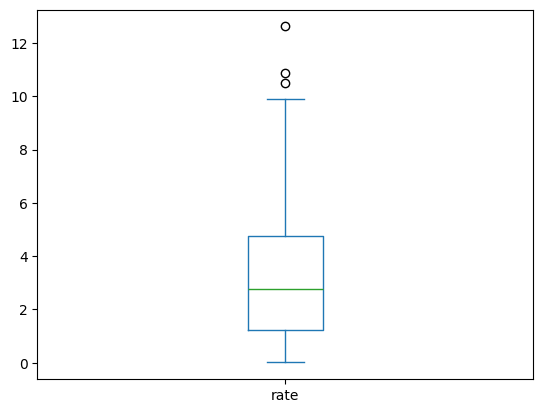

In [21]:
df['rate'].plot(kind='box')
plt.show()

In [22]:
df['SQRT_RATE']= df['rate']**0.5

In [23]:
df['sqrt_rate'] = np.sqrt(df['rate'])

In [24]:
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181


/tmp/ipython-input-25-3353594513.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'], ax=axes[0])
/tmp/ipython-input-25-3353594513.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['sqrt_rate'], ax=axes[1])


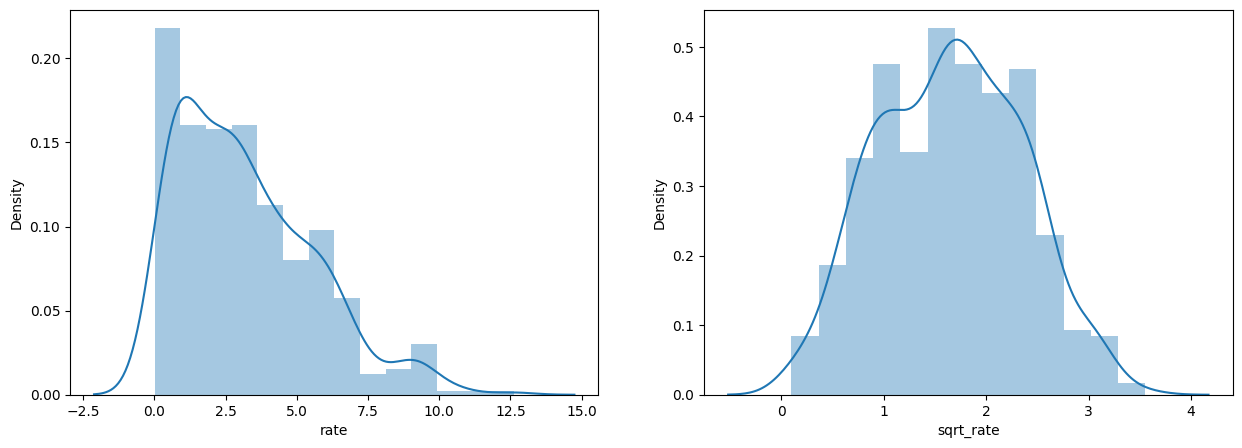

In [25]:
# Sơ đồ phân tán
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['sqrt_rate'], ax=axes[1])

plt.show()


In [26]:
# Log transformation
df['Log Rate'] = np.log(df['rate'])

df.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033


/tmp/ipython-input-27-3684653444.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['rate'], ax=axes[0])
/tmp/ipython-input-27-3684653444.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SQRT_RATE'], ax=axes[1])
/tmp/ipython-input-27-3684653444.py:6: UserWarning: 

`distplot` is a dep

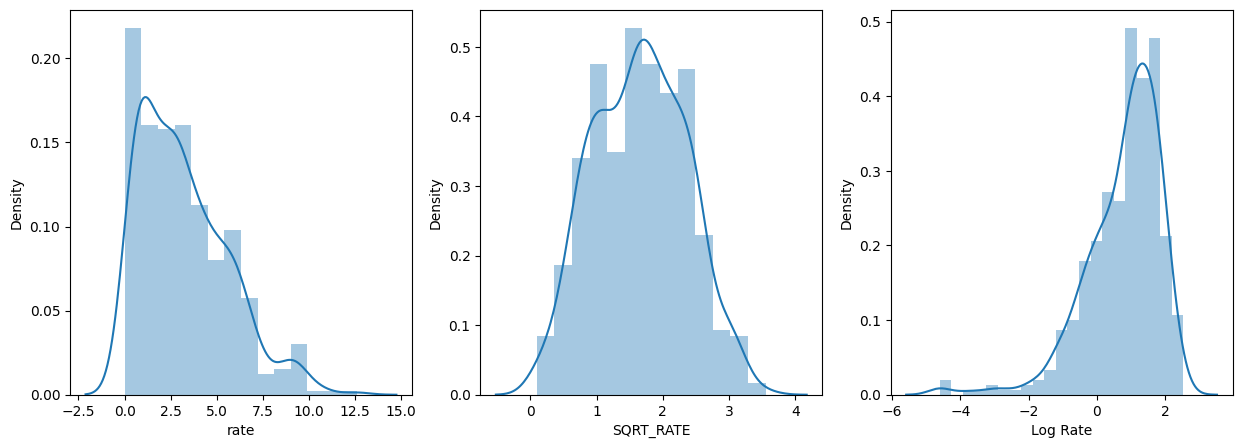

In [27]:

# So sánh các loại chuyển đổi
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.distplot(df['rate'], ax=axes[0])
sns.distplot(df['SQRT_RATE'], ax=axes[1])
sns.distplot(df['Log Rate'], ax=axes[2])

plt.show()


In [28]:
## Dùng hàm Lambda
df['LOG_Rate'] = df['rate'].apply(lambda x: np.log(x))

df.head()


,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate,SQRT_RATE,sqrt_rate,Log Rate,LOG_Rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15,1.466288,1.466288,0.765468,0.765468
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25,1.118034,1.118034,0.223144,0.223144
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68,0.824621,0.824621,-0.385662,-0.385662
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24,1.113553,1.113553,0.215111,0.215111
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13,1.769181,1.769181,1.141033,1.141033
